# Product Force - The Variant Bunch
February 22nd 2019

Lets readf in a ClinVar download, plot some histograms.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import json

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
download_fname = 'clinvar_GRN_OR_CFTR.txt'

In [4]:
df = pd.read_csv(download_fname, sep='\t')

In [5]:
df

,Name,Gene(s),Condition(s),Clinical significance (Last reviewed),Review status,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),Unnamed: 11
0,NM_002087.3(GRN):c.22G>A (p.Val8Met),GRN,not provided,"Uncertain significance(Last reviewed: Nov 14, ...","criteria provided, single submitter",17,42426554,17,44349186,594636,585699,NaN
1,NM_002087.3(GRN):c.615G>A (p.Ser205=),GRN,Seizures,"Likely benign(Last reviewed: May 16, 2017)","criteria provided, single submitter",17,42428075,17,44350707,590140,580359,NaN
2,NM_002087.3(GRN):c.803C>T (p.Thr268Met),GRN,Seizures,"Uncertain significance(Last reviewed: Dec 16, ...","criteria provided, single submitter",17,42428499,17,44351131,589992,580515,NaN
3,NM_002087.3(GRN):c.1432C>T (p.Arg478Cys),GRN,Seizures,"Uncertain significance(Last reviewed: Nov 22, ...","criteria provided, single submitter",17,42429727,17,44352359,589971,580366,NaN
4,NM_002087.3(GRN):c.892C>T (p.Arg298Cys),GRN,Seizures,"Uncertain significance(Last reviewed: Aug 30, ...","criteria provided, single submitter",17,42428787,17,44351419,589907,580240,NaN
5,NM_002087.3(GRN):c.1497G>C (p.Val499=),GRN,Seizures,"Likely benign(Last reviewed: Jun 21, 2016)","criteria provided, single submitter",17,42429792,17,44352424,589862,580367,NaN
6,NM_002087.3(GRN):c.1736G>A (p.Arg579His),GRN,Seizures,"Uncertain significance(Last reviewed: May 2, 2...","criteria provided, single submitter",17,42430120,17,44352752,589817,580372,NaN
7,NM_002087.3(GRN):c.1180-3C>T,GRN,Seizures,"Uncertain significance(Last reviewed: Dec 2, 2...","criteria provided, single submitter",17,42429380,17,44352012,589242,580243,NaN
8,NM_002087.3(GRN):c.393C>G (p.Phe131Leu),GRN,Seizures,"Uncertain significance(Last reviewed: Dec 14, ...","criteria provided, single submitter",17,42427639,17,44350271,589035,580334,NaN
9,NM_002087.3(GRN):c.139-3T>C,GRN,Seizures,"Uncertain significance(Last reviewed: Feb 7, 2...","criteria provided, single submitter",17,42426791,17,44349423,588760,580331,NaN


In [6]:
# Extract genes column.   Some show multiple genes/locations - e.g. "CFTR|LOC11167447".  For now, just take the fires
all_genes = df['Gene(s)']
pruned_genes = [g.split('|')[0] for g in all_genes]

In [7]:
gene_counts = Counter(pruned_genes)

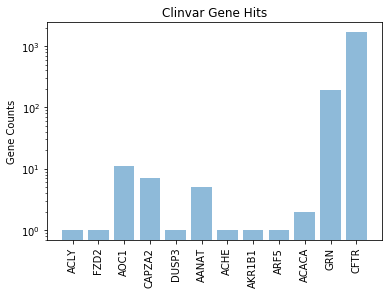

In [8]:
gene_names = gene_counts.keys()
counts = gene_counts.values()
bar_pos = np.arange(len(gene_names))

plt.bar(gene_names, counts, align='center', alpha=0.5)
plt.xticks(bar_pos, gene_names)
plt.ylabel('Gene Counts')
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.title('Clinvar Gene Hits')
plt.show()

In [9]:
gene_counts

Counter({'AANAT': 5,
         'ACACA': 2,
         'ACHE': 1,
         'ACLY': 1,
         'AKR1B1': 1,
         'AOC1': 11,
         'ARF5': 1,
         'CAPZA2': 7,
         'CFTR': 1673,
         'DUSP3': 1,
         'FZD2': 1,
         'GRN': 190})

In [10]:
print(json.dumps([{'name':key, 'value':gene_counts[key]} for key in gene_counts.keys()], indent=4, sort_keys=True))

[
    {
        "name": "ACLY",
        "value": 1
    },
    {
        "name": "FZD2",
        "value": 1
    },
    {
        "name": "AOC1",
        "value": 11
    },
    {
        "name": "CAPZA2",
        "value": 7
    },
    {
        "name": "DUSP3",
        "value": 1
    },
    {
        "name": "AANAT",
        "value": 5
    },
    {
        "name": "ACHE",
        "value": 1
    },
    {
        "name": "AKR1B1",
        "value": 1
    },
    {
        "name": "ARF5",
        "value": 1
    },
    {
        "name": "ACACA",
        "value": 2
    },
    {
        "name": "GRN",
        "value": 190
    },
    {
        "name": "CFTR",
        "value": 1673
    }
]
